# Crop Rotation

This notebook can be run to recreate the analysis done to study crop rotation varieties and their effects on crop yields.

Begin by importing the library to run the experiments and initiate the classes.

In [9]:
import sys; sys.path.append("../../../")
import tara.SongroveBotanicals.research as hub
crop = hub.CropRotation()
%matplotlib inline

### Load the Data
Run the cells below to run the data gathered for the experiment.  For more on how the data was collected see https://www.stellargrove.com/irrigation-methods.  The data returned is broken into two dataframes: yield and growth rate.

In [10]:
data = crop.loadData()

# Analysis of Irrigation Methods Using Crop Yields

## Examine the Data

Run this cell if you want to see what it looks like after being transformed into a usable state.

In [3]:
data.head()

,method,Nitrogen,Phosphorus,Potassium
0,one,25,10,20
1,one,30,12,22
2,one,28,9,21
3,two,35,15,27
4,two,40,18,30


## Introduction

To begin we will take a quick visual representation of what the data looks like in order to understand whether or not our initial hypothesis looks like it will hold true or not.

## Yield Box Plots

Running the cell below will create a simple box plot for you to view how the data is distributed amongst the different irrigation methods.

<AxesSubplot:>

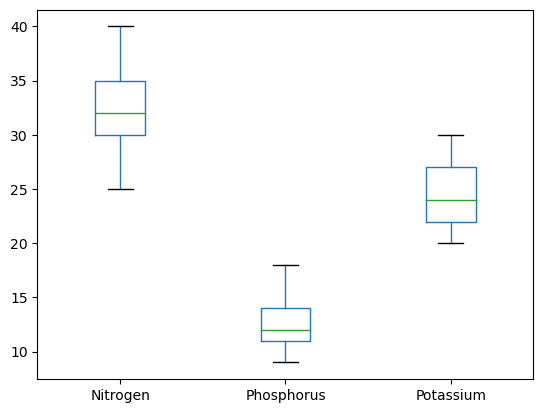

In [4]:
data.boxplot(grid=False)

Now that a visual representation has been established let's use stats to ensure that our intuition holds up to mathematical rigor.

## Calculate the Mean Yield

For each of the different Irrigation Methods, calculate the mean yield of the crop grown.  The mean along with the Standard Deviation will give us an idea of whether or not we can make claims that one method is better than another.

In [11]:
yields = crop.calculateMeans(data,sort_order="d")
yields

C:\stellar-grove\tara\SongroveBotanicals\research.py:168: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = pd.DataFrame(data.mean()).reset_index()


,Method,AverageYield
0,Nitrogen,32.333333
2,Potassium,24.444444
1,Phosphorus,12.666667


## Write Out Hypothesis

As can be seen from the very large F statistic and correspondingly small p-value, we can begin to assert some level of confidence that our null hypothesis is rightfully rejected.

Looking at the means, it is natural to rank the effectiveness of the methods as:
<ol>
    <li>Drip
    <li>Flood
    <li>Furrow
    <li>Sprinkler
</ol>

In the next section we will use ANOVA analysis to confirm our assumptions.

In [12]:
f_Yield, p_Yield = crop.runANOVA(data)
print(f_Yield, p_Yield)

1 1


## Dominance Analysis

Using the table below we can test on a pairwise basis whether or not the sample means are the same or not. <br>
In this example, we use the t-test to determine whether the two methods that are being compared are the same or not. <br>
To determine if one variable is greater than another, we first compare the two means, then determine whether or not we can reject the null hypothesis of the means being equal. <br>
The table below outlines each mean, the test statistic, the p-value of the t-test performed and whether or not the test statistic was significant based on the p-value. 

In [14]:
dominance_results = crop.runDominance(data,"t-test")
dominance_results

AttributeError: 'CropRotation' object has no attribute 'runDominance'

As can be seen all the pairwise comparisons were statistically significant, meaning that we can adequately reject the null hypothesis that the means of each method that is being compared are equal. <br>
Our initial ranking of <b>Drip -> Flood -> Furrow -> Sprinkler </b> seems to hold true with the means of each being: 11.47, 10.05, 9.63 and 9.02 respectively.  Examining all the pairwise comparisons laid out in the table we show that the Drip method of irrigation worked best when comparing the Yields of the crop.  

## Power of Test

One last note on how extensively that this analysis can be <i>trusted</i> that it is correct.  With only 10 trials, one would be rightfully a little skeptical that you are meeting all the assumptions required in order to perform the tests as the framework requires. <br>
To test the power of the t-test we used, we can run the <b><i>determinePower</b></i> function to see how well our test works.<br>
Using an effect size equal to Cohen's d = 0.8 we have the following:

In [15]:
effect_size =  0.8
hub.determinePower(effect_size, 10)

0.6162327563473081

More aptly, from the documentation: Power is the probability that the test correctly rejects the Null Hypothesis if the Alternative Hypothesis is true.  <br>
With the power of this test being roughly 0.62, we would have some confidence in this experiment to appropriately reject the null hypothesis of all the means being equal in favor the null that they are not. <br>
This then brings the question of how can we determine how many trials must be performed in order to have a good amount of <i>faith</i> in the experiment?  In order to do so, we need to solve for the sample size based on the effect we'd expect to see and the alpha value we are using as our type I tolerance.

In [16]:
size = hub.determineSampleSize(0.8)
size

19